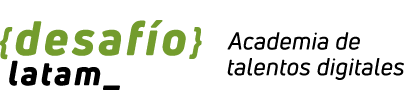

<center><h1> <font color='green'>Clustering con Fuzzy CMeans</font></h1></center>

## Importación de bibliotecas y lectura de datos

In [1]:
!pip install scikit-fuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import skfuzzy as fuzz

import warnings
warnings.filterwarnings('ignore')

# Cargar el conjunto de datos Iris
iris = load_iris()
X = pd.DataFrame(iris.data)

     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/994.0 kB ? eta -:--:--
     ---------------------------------------- 10.2/994.0 kB ? eta -:--:--
      ------------------------------------ 20.5/994.0 kB 162.5 kB/s eta 0:00:06
     - ----------------------------------- 30.7/994.0 kB 145.2 kB/s eta 0:00:07
     - ----------------------------------- 30.7/994.0 kB 145.2 kB/s eta 0:00:07
     - ----------------------------------- 41.0/994.0 kB 151.3 kB/s eta 0:00:07
     ---- ------------------------------- 112.6/994.0 kB 363.1 kB/s eta 0:00:03
     ----- ------------------------------ 153.6/994.0 kB 416.7 kB/s eta 0:00:03
     -------- --------------------------- 225.3/994.0 kB 528.4 kB/s eta 0:00:02
     ----------- ------------------------ 317.4/994.0 kB 701.4 kB/s eta 0:00:01
     -------------- --------------------- 389.1/994.0 kB 712.2 kB/s eta 0:00:01
     --------------------- -------------- 583.7/994.0 kB 992

## Número óptimo del parametro m

In [2]:
# Definir una lista de posibles valores de m
m_values = np.arange(1.1, 3.1, 0.1)

# Inicializar listas para almacenar las métricas
silhouette_scores = []
davies_bouldin_scores = []

# Realizar clustering fuzzy con diferentes valores de m y calcular las métricas
'''
cntr: Es una matriz que contiene los centroides finales de los clusters encontrados por el algoritmo Fuzzy C-Means. Cada fila representa un centroide y cada columna representa una característica.


u: Es una matriz que contiene los grados de pertenencia de cada punto a cada cluster. Cada fila representa un punto y cada columna representa un cluster. Los valores en u son números entre 0 y 1 que representan la probabilidad de que un punto pertenezca a cada cluster.



u0: Es una matriz que contiene los grados de pertenencia iniciales de cada punto a cada cluster. Al inicio del algoritmo, estos valores se inicializan aleatoriamente o de alguna otra manera.



d: Es una matriz que contiene las distancias entre los puntos y los centroides finales de los clusters. Cada fila representa un punto y cada columna representa un cluster.



jm: Es el valor de la función objetivo del clustering fuzzy. Representa el valor de la función de costo que se intenta minimizar durante el proceso de clustering.



p: Es un valor que representa el exponente utilizado en la función de costo para el clustering fuzzy.



fpc: Es el índice de partición fuzzy. Representa la fracción de puntos que se encuentran correctamente asignados en los clusters finales.

'''


for m in m_values:
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X.T, 3, m, error=0.005, maxiter=100) #explicar este código
    labels = np.argmax(u, axis=0)

    # Calcular la puntuación de silueta
    silhouette_scores.append(silhouette_score(X, labels))

    # Calcular el índice de Dunn
    dunn_index = davies_bouldin_score(X, labels)
    davies_bouldin_scores.append(dunn_index)

# Encontrar el valor óptimo de m basado en la puntuación de silueta
optimal_index = np.argmax(silhouette_scores)
optimal_m = m_values[optimal_index]

## Clustering y comparación con etiquetas reales

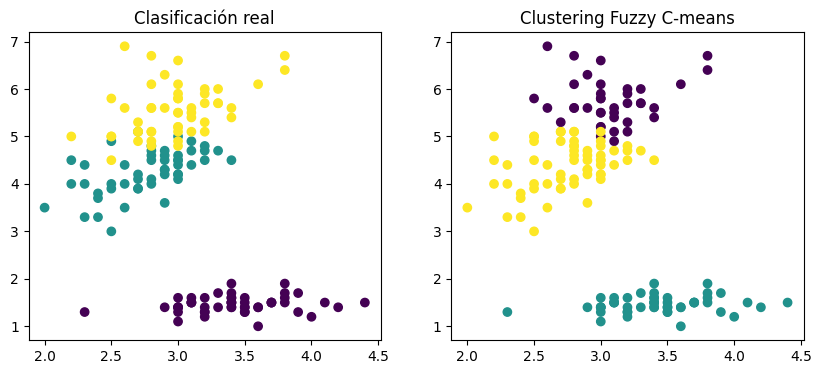

Valor óptimo de m: 1.1


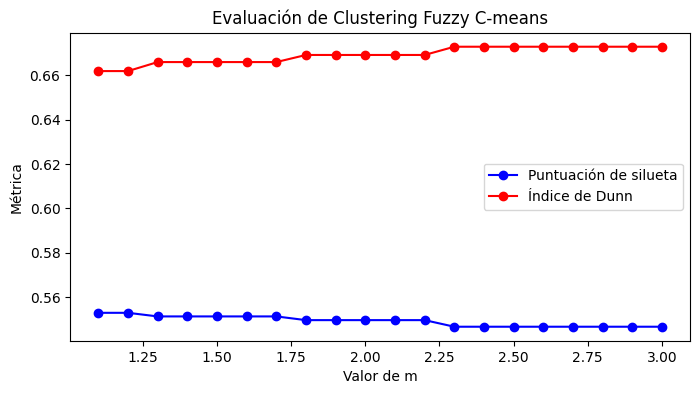

In [3]:
# Realizar clustering con el valor óptimo de m
optimal_cntr, optimal_u, optimal_u0, optimal_d, optimal_jm, optimal_p, optimal_fpc = fuzz.cluster.cmeans(X.T, 3, optimal_m, error=0.005, maxiter=1000)
optimal_labels = np.argmax(optimal_u, axis=0)

# Graficar los resultados en 2D
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=iris.target, cmap='viridis')
plt.title('Clasificación real')
plt.subplot(122)
plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=optimal_labels, cmap='viridis')
plt.title('Clustering Fuzzy C-means')
plt.show()

# Imprimir el valor óptimo de m
print(f"Valor óptimo de m: {optimal_m}")

# Graficar la puntuación de silueta y el índice de Dunn
plt.figure(figsize=(8, 4))
plt.plot(m_values, silhouette_scores, 'bo-', label='Puntuación de silueta')
plt.plot(m_values, davies_bouldin_scores, 'ro-', label='Índice de Dunn')
plt.xlabel('Valor de m')
plt.ylabel('Métrica')
plt.title('Evaluación de Clustering Fuzzy C-means')
plt.legend()
plt.show()

<center><strong>¡Regresemos a nuestra presentación</strong></center>